IMPORTING THE DEPENDENCIES

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid") # set the background for the graphs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#importing plotly library for some great visualizations
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.express as px

#handling missing value
from sklearn.impute import SimpleImputer

#importing warning library ignoring unwanted error message
import warnings
warnings.filterwarnings("ignore")

#import Scipy libarary for statistical analysis
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm

#import Algorithm libaries for feature importance, data processing, modeling & evaluation
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Loading Data

In [3]:
data=pd.read_csv("loan-train.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


# Univariate Analysis
Univariate analysis involves the analysis of a single variable at a time. It focuses on understanding the distribution, central tendency, and variability of that variable without considering the relationships with other variables. In simpler terms, it's like zooming in on one aspect of your data to understand its characteristics independently of anything else.


### We will create a function first.

##### This function is a flexible plotting function designed to create different types of plots based on the provided parameters

In [9]:
def plot_data(data, column, plot_type='count',palette=['#2e921b', '#7f1b92'], figsize=(10,6)):
    fig, ax = plt.subplots(figsize=figsize)
    if plot_type == 'count':
        sns.countplot(x=column, data=data, ax=ax, palette=palette)
        ax.set_title(f"count Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight ='bold')
        ax.set_ylabel('count',size=12, weight ='bold')
        total=len(data[column])
        for p in ax.patches:
            height = p.get_height()
            pct = 100 * height / total
            ax.annotate(f'{pct:.1f}%', (p.get_x()+0.3, height+5), fontsize=12)
    elif plot_type == 'swarm':
        sns.swarmplot(y=column, data=data, ax=ax, palette=palette)
        ax.set_title(f"Swarm Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Value", size=12, weight='bold')
    elif plot_type == 'dist':
        sns.histplot(data=data, x=column, ax=ax, kde=True, palette=palette)
        ax.set_title(f"Distribution Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Frequency", size=12, weight='bold')
    elif plot_type == 'stacked':
        groupby_df = data.groupby(column)['Loan_Status'].value_counts(normalize=True).unstack()
        
        groupby_df.plot(kind='bar', stacked=True, ax=ax, color=palette)
        ax.set_title(f"Stacked Bar Plot of {column}", size=15, weight='bold')
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Proportion", size=12, weight='bold')
        ax.legend(title="Loan Status", loc='upper right')
        for i in range(groupby_df.shape[0]):
            for j in range(groupby_df.shape[1]):
                pct = groupby_df.iloc[i, j] * 100
                ax.annotate(f"{pct:.1f}%", xy=(i, groupby_df.iloc[i, :j].sum() + pct/2),
                            ha='center', va='center', color='white', weight='bold')
    else:
        print(f"Invalid plot type: {plot_type}")
    
    plt.show()
        
        

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


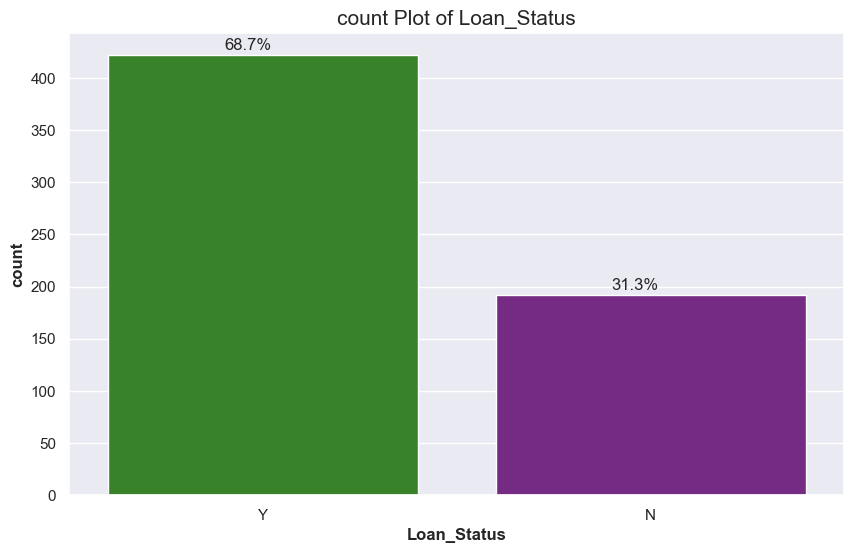

In [11]:
plot_data(data, 'Loan_Status', plot_type='count')

##### Based on the results above:
##### The countplot reveals that most loan applications were successful, with 422 instances marked as "Y" (yes) in the "Loan_Status" column. In contrast, there were fewer instances of rejected applications, totaling 192 marked as "N" (no). This considerable difference between approved and rejected applications suggests an imbalance in the dataset concerning the target variable.

([<matplotlib.patches.Wedge at 0x18801817310>,
 [Text(-0.9168069130532235, 0.6078363958976293, 'Male'),
  Text(0.916806913053223, -0.6078363958976297, 'Female')],
 [Text(-0.5000764980290309, 0.33154712503507044, '81.4%'),
  Text(0.5000764980290308, -0.3315471250350707, '18.6%')])

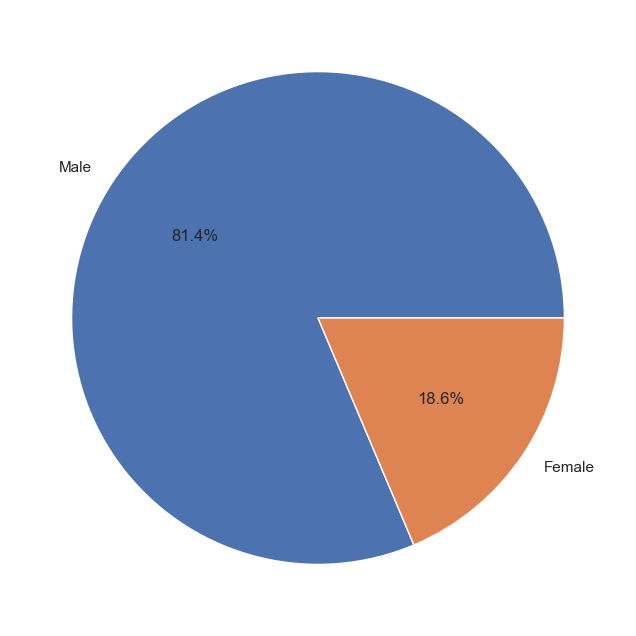

In [12]:
gender_counts = data['Gender'].value_counts()

names = ['Male', 'Female']
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(gender_counts, labels=names, autopct='%.1f%%')

##### According to the pie plot:

- Most loan applicants are male, constituting roughly 81% of the total.
- Female applicants comprise approximately 18.6% of the dataset.
- The custom color scheme aids in visually emphasizing the gender distribution, facilitating a clear comparison between male and female applicants.

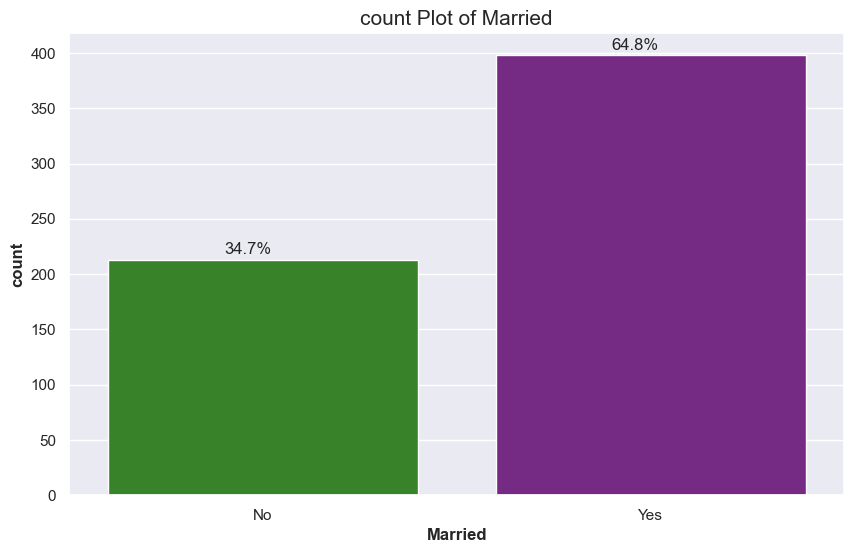

In [13]:
plot_data(data, 'Married', plot_type='count')

#### The bar plot displays the count of married and unmarried individuals in the loan eligibility dataset. It's evident that the dataset predominantly consists of married individuals, totaling 398. In comparison, unmarried individuals amount to 213. This indicates a higher likelihood of married individuals applying for loans compared to unmarried individuals.

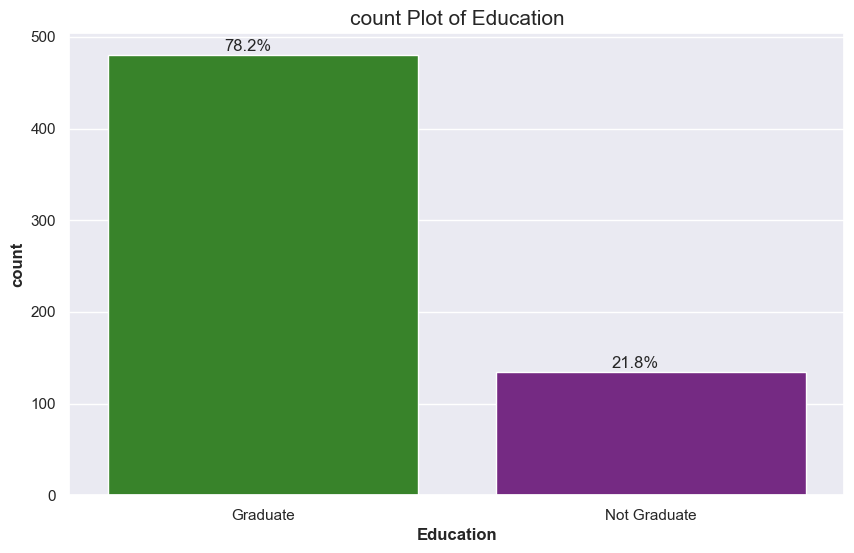

In [14]:
plot_data(data, 'Education', plot_type='count')

#### The bar plot shows that the majority of the applicants are graduates with a count of 480, whereas the count of applicants who are not graduates is 134. This indicates that a higher number (78.2%) of graduates apply for loans compared to those who are not graduates.

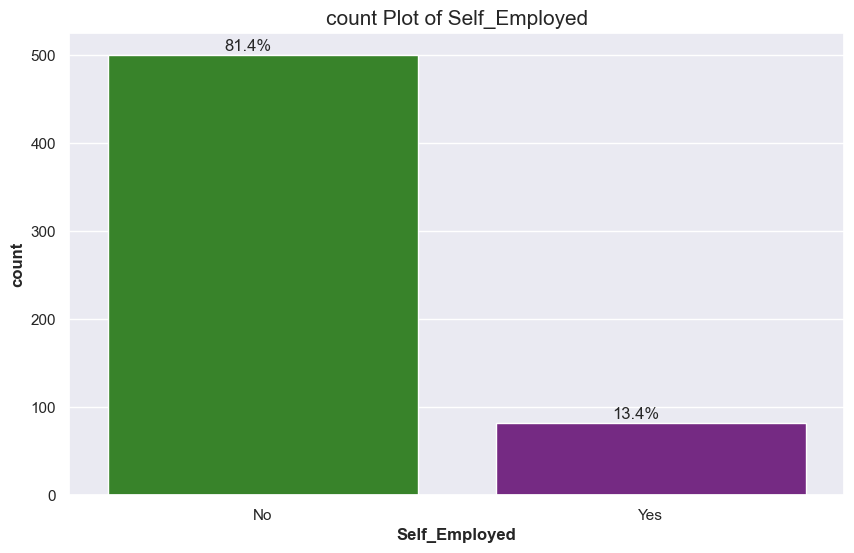

In [15]:
# Create count plot of Employment status
plot_data(data, 'Self_Employed', plot_type='count')

#### The bar plot representing the Self_Employed column reveals that among the 582 applicants, 500 are not self-employed, while only 82 are. This indicates that the majority, accounting for 81.4% of the loan applicants, are not self-employed.

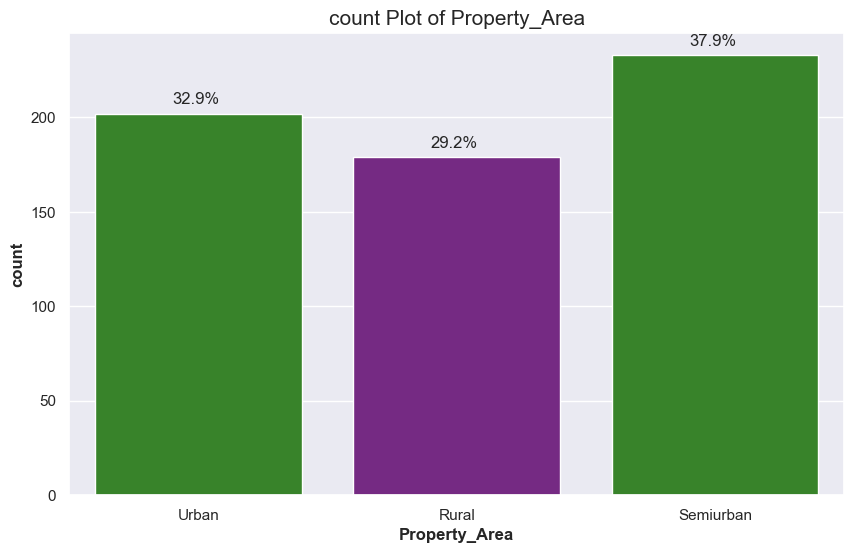

In [16]:
plot_data(data, 'Property_Area', plot_type='count')

#### According to the outcome "Semiurban 233, Urban 202, Rural 179," it's apparent that the semiurban region boasts the highest property count at 37.9%, followed by urban and rural areas, respectively. The noticeable contrast in count between the semiurban area and the other two suggests a significant disparity.

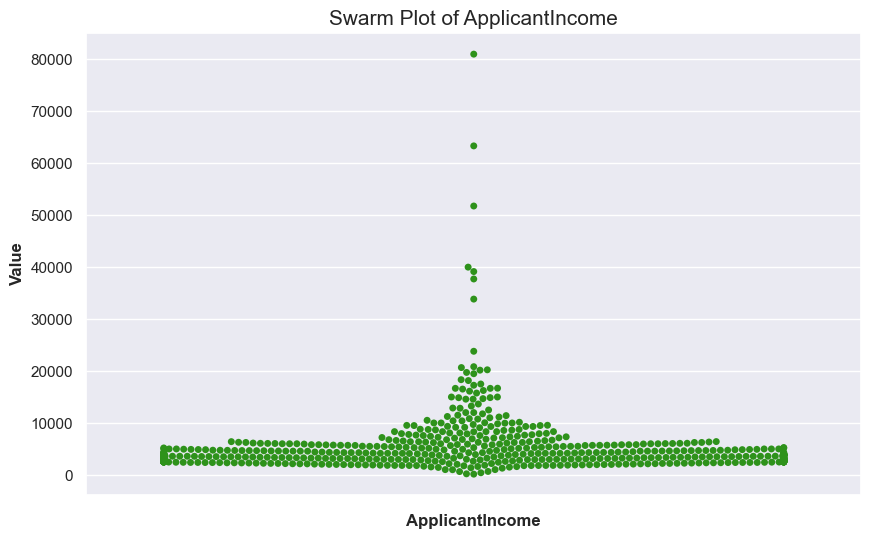

In [17]:
plot_data(data, 'ApplicantIncome', plot_type='swarm')

#### According to the swarm plot results:

- The distribution is skewed to the right, indicating that most applicants have incomes ranging from 0 to 25,000.
- There are a few extreme outliers with incomes exceeding 80,000, though they are scarce in number.
- In summary, the swarm plot effectively illustrates the income distribution among loan applicants, revealing the prevalence of lower to moderate income levels with some notable exceptions.

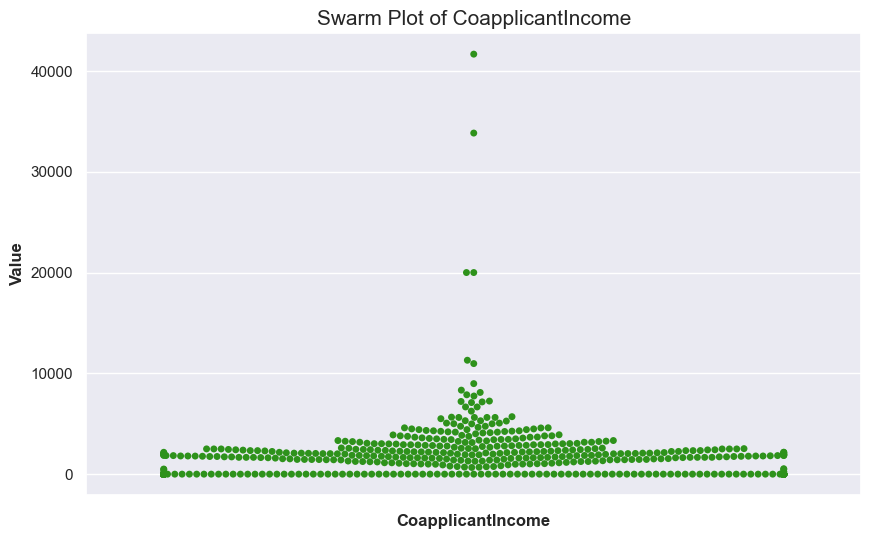

In [18]:
plot_data(data, 'CoapplicantIncome', plot_type='swarm')

#### Based on the swarm plot findings:

- Most applicants either lack a co-applicant or possess one with a notably low income.
- Only a small fraction of applicants exhibit high co-applicant incomes.
- The distribution is prominently skewed to the right, with rare outliers on the right side.
- This suggests that the majority of applicants aren't significantly reliant on their co-applicants for their loan requests.

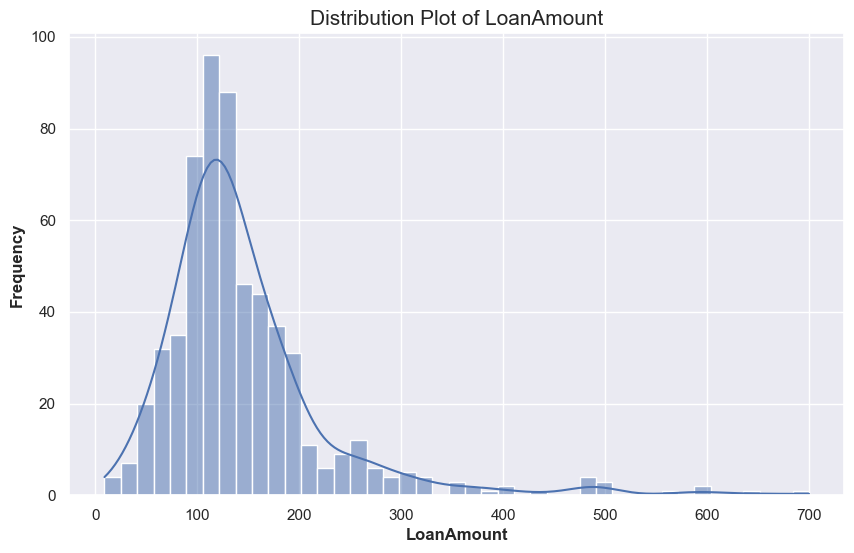

In [19]:
plot_data(data, 'LoanAmount', plot_type='dist')


#### Based on the distribution plot:

- The data exhibits a right-skewed distribution, suggesting that most loan amounts are on the lower side.
- Some outliers are evident, indicating that certain individuals have obtained exceptionally large loans.
- Additionally, there is a prominent peak observed around the 120-140 range, indicating a substantial number of loans falling within that range.
- Moreover, a long tail is visible towards the higher end of the scale, indicating that while the majority of loans are small, there are some considerably larger loans present in the dataset.

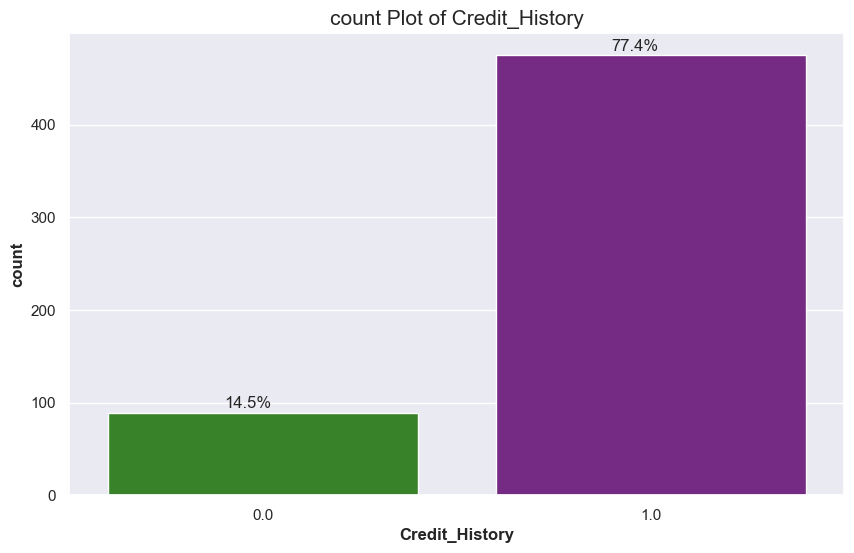

In [20]:
plot_data(data, 'Credit_History', plot_type='count')


Based on the count plot:

- The majority of applicants possess a credit history, evident from the notably higher count associated with the value '1.0'.
- Comparatively, the count of applicants without a credit history ('0.0') is substantially lower.
- Despite this, nearly 100 applicants still lack a credit history, indicating a noteworthy presence.
- It's plausible that the presence or absence of a credit history could influence loan approval, suggesting the potential significance of this column in predicting loan approvals.



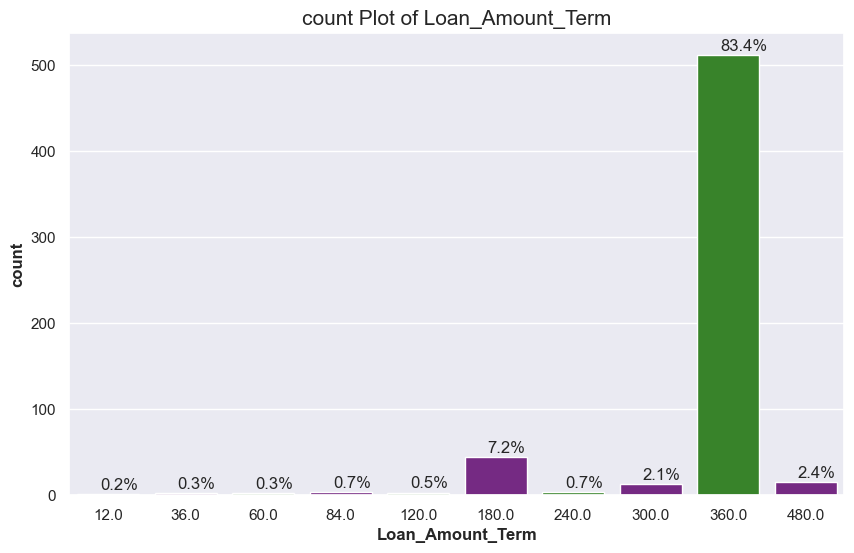

In [21]:
plot_data(data, 'Loan_Amount_Term', plot_type='count')


#### Based on the count plot:

- The most prevalent loan term is 360 months (or 30 years), occurring 512 times in the dataset.
- Following 360 months, other common loan terms include 180 months (or 15 years), 480 months (or 40 years), and 300 months (or 25 years).
- Few instances of loan terms shorter than 180 months are observed, with 13 instances of 300 months, 4 instances of 240 months, 3 instances of 120 months, 2 instances of 60 months, and 2 instances of 36 months.
- A single occurrence of a 12-month loan term is noted, which is an atypical value.
- The predominant preference among borrowers in this dataset appears to be a 30-year loan term.

### Conclusion after conducting Univariate Analysis:

- LoanAmount: The distribution plot revealed the presence of outliers in the LoanAmount column, along with 22 missing values.
- CoapplicantIncome: The swarm plot indicated outliers in the CoapplicantIncome column. Notably, 273 values were recorded as 0, likely indicating applicants without co-applicants.
- Loan_Amount_Term: The count plot displayed 14 missing values in the Loan_Amount_Term column.
- Credit_History: The count plot identified 50 missing values in the Credit_History column. Furthermore, it showed that the majority of applicants have a credit history.

In summary, the univariate analysis underscores the need to address missing values and outliers in certain columns before proceeding with further analysis. Handling these issues will be crucial during the data pre-processing stage, where techniques such as mean or median imputation for missing values and Winsorization or threshold-based removal for outliers can be employed.

### Handling Missing Values

In [22]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
# created a SimpleImputer instance with the 'mean' strategy specifically for the LoanAmount and Loan_Amount_Term columns.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data[['LoanAmount', 'Loan_Amount_Term']]=imputer.fit_transform(data[['LoanAmount', 'Loan_Amount_Term']])

# Created a SimpleImputer instance employing the 'most_frequent' strategy for the Credit_History, Self_Employed, Dependents, Gender, and Married columns.
imputer = SimpleImputer(strategy='most_frequent')
data[['Credit_History', 'Self_Employed', 'Dependents', 'Gender', 'Married']] = imputer.fit_transform(data[['Credit_History', 'Self_Employed', 'Dependents', 'Gender', 'Married']])

In [24]:
data.isnull().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# HANDLING OUTLIERS

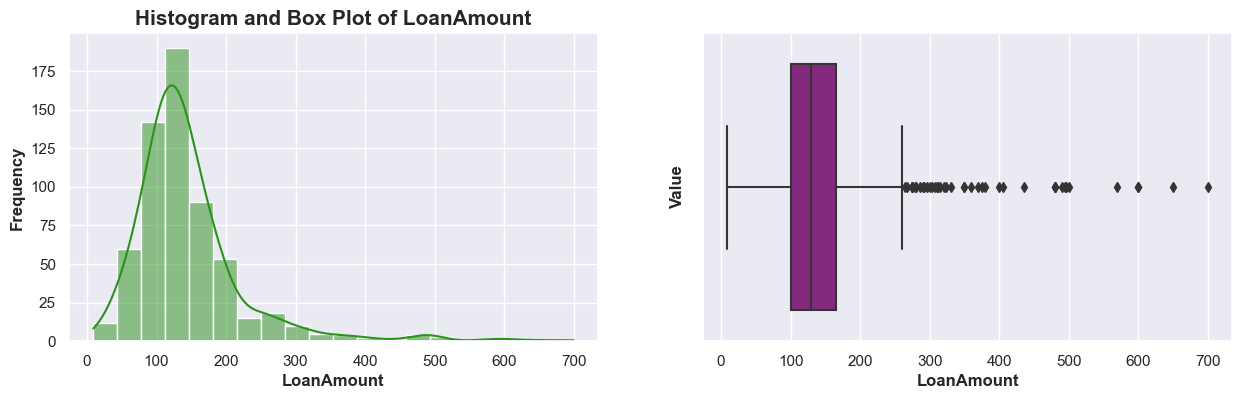

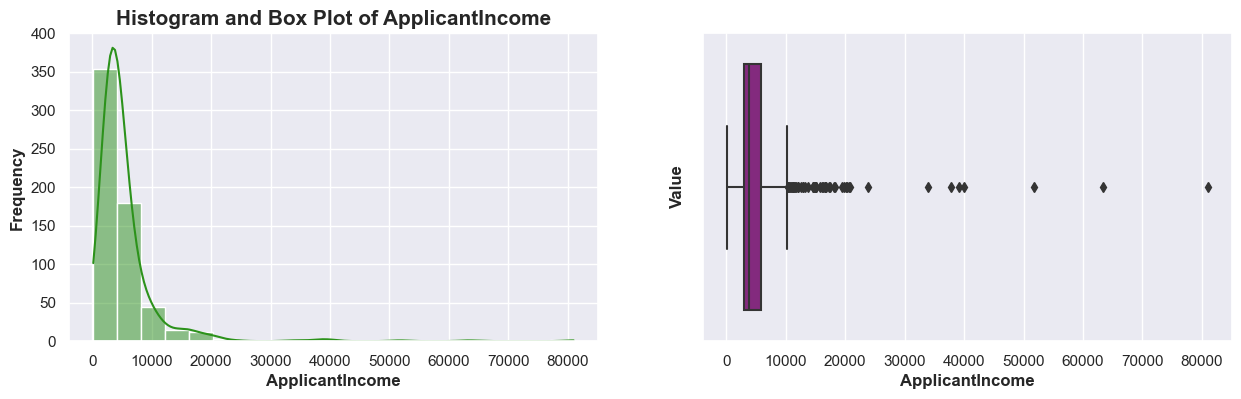

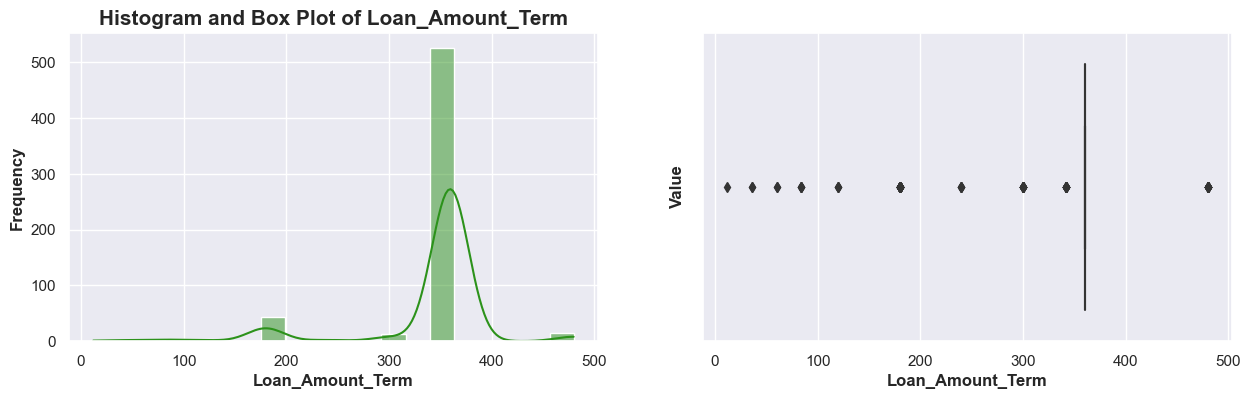

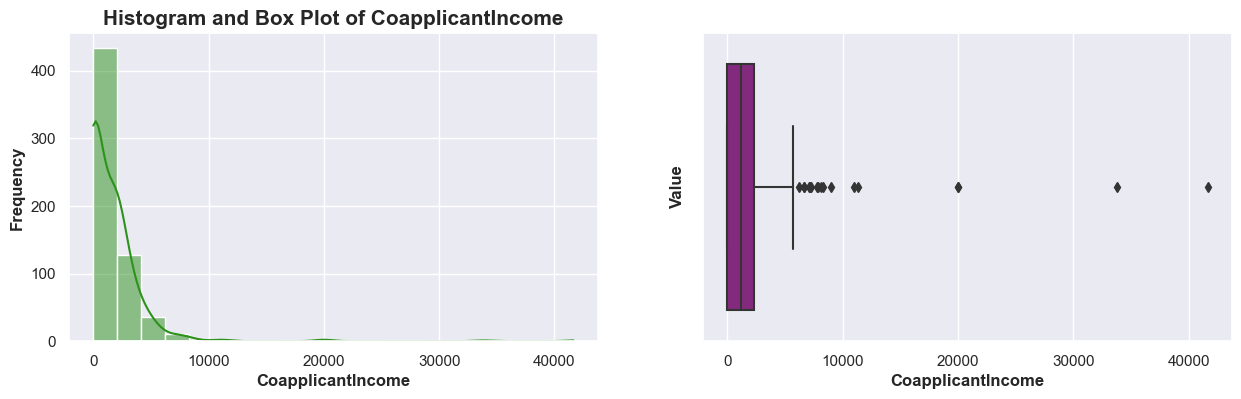

In [25]:

#Creating a list containing the columns that have outliers

col_outliers = ["LoanAmount","ApplicantIncome","Loan_Amount_Term","CoapplicantIncome"]

#Creating a function for visualizing outliers utilizing box and distribution plots
def plot_hist_box(data, column):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
    sns.histplot(data=data, x=column, bins=20, kde=True, ax=ax1, color='#2c921b')
    sns.boxplot(data=data, x=column, ax=ax2, color='#921b8b')
    ax1.set_title(f"Histogram and Box Plot of {column}", size=15, weight='bold')
    ax1.set_xlabel(column, size=12, weight='bold')
    ax1.set_ylabel("Frequency", size=12, weight='bold')
    ax2.set_xlabel(column, size=12, weight='bold')
    ax2.set_ylabel("Value", size=12, weight='bold')
    plt.show()

#Displaying all the columns at once
for col in col_outliers:
    plot_hist_box(data, col)


In [26]:
def remove_outliers(data, columns, k=1.5):
    for column in columns:
        q1=data[column].quantile(0.25)
        q3=data[column].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-k * iqr
        upper_bound=q3+k*iqr
        
        data =data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data



In [27]:
columns = ['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term', 'CoapplicantIncome']
data = remove_outliers(data,columns)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            433 non-null    object 
 1   Gender             433 non-null    object 
 2   Married            433 non-null    object 
 3   Dependents         433 non-null    object 
 4   Education          433 non-null    object 
 5   Self_Employed      433 non-null    object 
 6   ApplicantIncome    433 non-null    int64  
 7   CoapplicantIncome  433 non-null    float64
 8   LoanAmount         433 non-null    float64
 9   Loan_Amount_Term   433 non-null    float64
 10  Credit_History     433 non-null    object 
 11  Property_Area      433 non-null    object 
 12  Loan_Status        433 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 47.4+ KB


### Bivariate Analysis
Bivariate analysis in statistics involves the simultaneous analysis of two variables to understand the relationship between them. It explores how changes in one variable are associated with changes in another variable. This analysis helps in determining the strength, direction, and nature of the relationship between the variables, whether they are correlated, and if there are any patterns or trends present. Bivariate analysis commonly employs techniques such as correlation analysis, scatter plots, and contingency tables to examine the relationship between two variables.





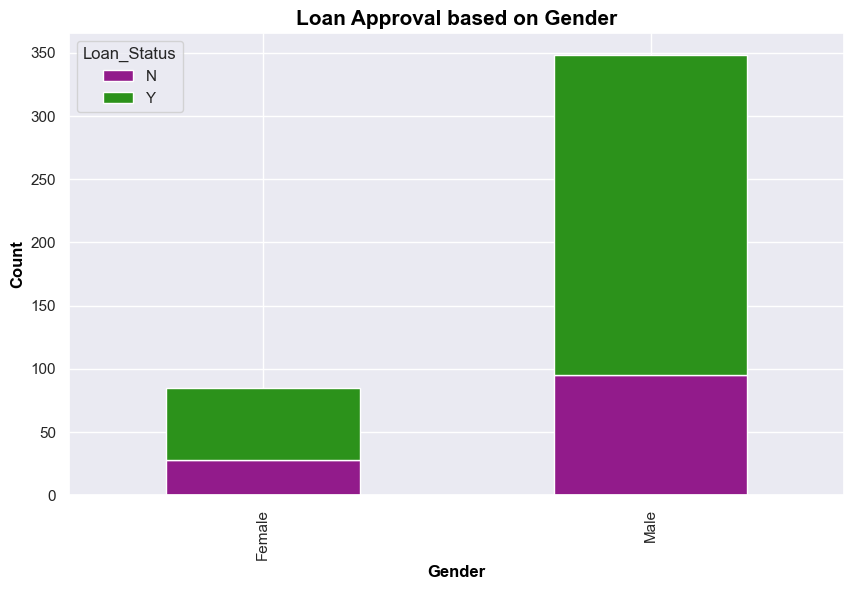

In [29]:
gender_loan = data.groupby(['Gender', 'Loan_Status']).size().unstack()
colors = ['#921b8b', '#2c921b']
gender_loan.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))
plt.title('Loan Approval based on Gender', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Gender', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black')
plt.show()

##### Based on the plot, we can draw the following conclusions:
The plot suggests that although the number of male applicants surpasses that of female applicants, the loan approval rates are comparable between genders. Most male applicants were granted loans, with a slightly lower approval rate observed among female applicants.

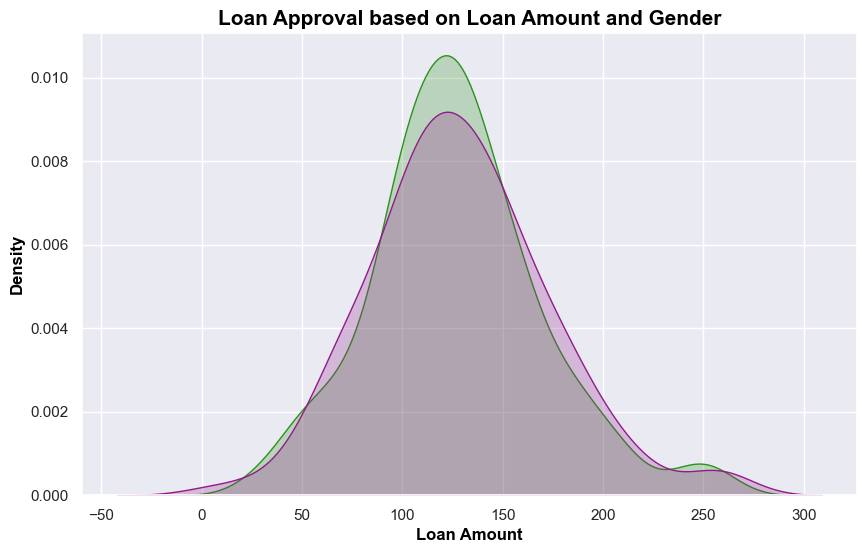

In [30]:
plt.figure(figsize=(10,6))
sns.kdeplot(data.loc[data['Loan_Status']=='Y', 'LoanAmount'], label='Approved', fill='1', color='#2c921b')
sns.kdeplot(data.loc[data['Loan_Status']=='N', 'LoanAmount'], label='Not Approved', fill='1', color='#921b8b')
plt.title('Loan Approval based on Loan Amount and Gender', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Loan Amount', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Density', fontsize=12, fontweight='bold', color='black')
plt.show()

- According to the density plot, we observe a slightly elevated density of approved loans as Loan Amount values increase. This implies a potential positive correlation between Loan Amount and Loan Status, indicating that individuals seeking larger loans may have a greater likelihood of approval.

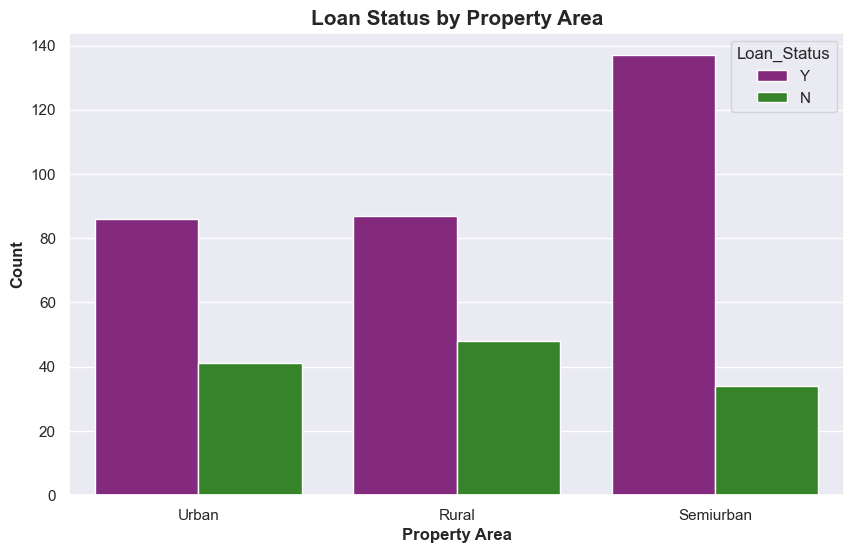

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Property_Area', hue='Loan_Status', palette=colors)
plt.title('Loan Status by Property Area', fontsize=15, fontweight='bold')
plt.xlabel('Property Area', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


- The count plot reveals that the greatest number of approved loans is observed in Semiurban areas, followed by Urban areas, with Rural areas having the fewest approved loans. Similarly, the highest count of not approved loans is also found in Semiurban areas, followed by Urban areas, while Rural areas have the lowest count of not approved loans.

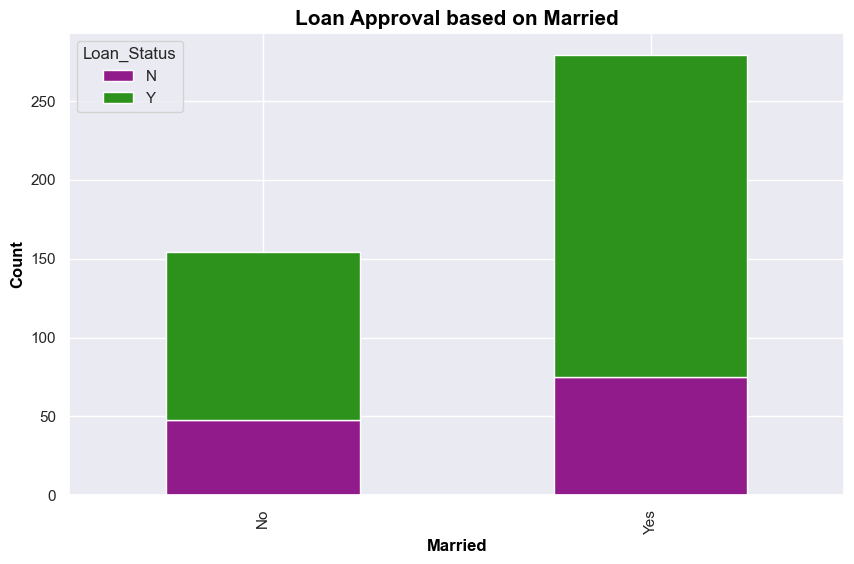

In [32]:
gender_loan = data.groupby(['Married', 'Loan_Status']).size().unstack()
colors = ['#921b8b', '#2c921b']
gender_loan.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))
plt.title('Loan Approval based on Married', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Married', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black')
plt.show()

- The stacked bar plot clearly indicates a greater number of approved loans in the 'Yes' category of the 'Married' column. Conversely, the count of rejected loans is also higher for the 'No' category of the 'Married' column.

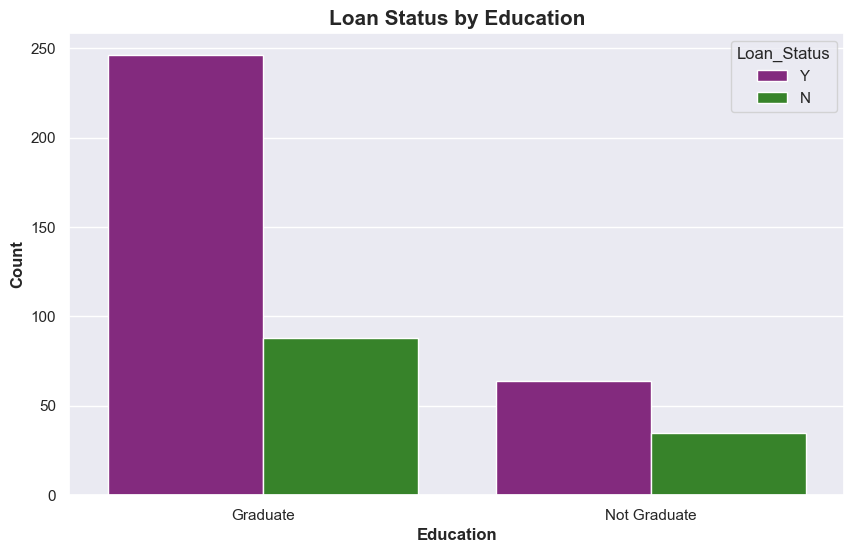

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Education', hue='Loan_Status', palette=colors)
plt.title('Loan Status by Education', fontsize=15, fontweight='bold')
plt.xlabel('Education', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

- The bar plot illustrates that applicants with a Graduate degree have a higher likelihood of loan approval compared to those without a Graduate education. Specifically, the count of approved loans is greater for the Graduate group, while the count of unapproved loans is higher for the Not Graduate group. This suggests that educational attainment may influence loan eligibility.

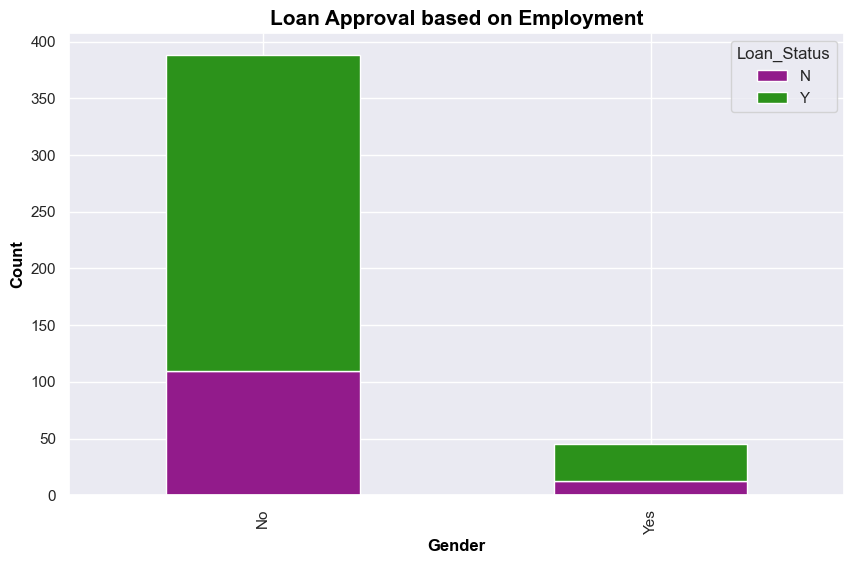

In [34]:
gender_loan = data.groupby(['Self_Employed', 'Loan_Status']).size().unstack()
colors = ['#921b8b', '#2c921b']
gender_loan.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))
plt.title('Loan Approval based on Employment', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Gender', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black')
plt.show()

Observations drawn from the stacked bar plot include:
- The plot indicates that applicants who are not self-employed have a greater count of approved loans compared to self-employed individuals. Among self-employed applicants, a higher percentage of loan applications have been approved. This suggests that self-employment status may influence loan approval rates, with non-self-employed applicants being more likely to have their loans approved.

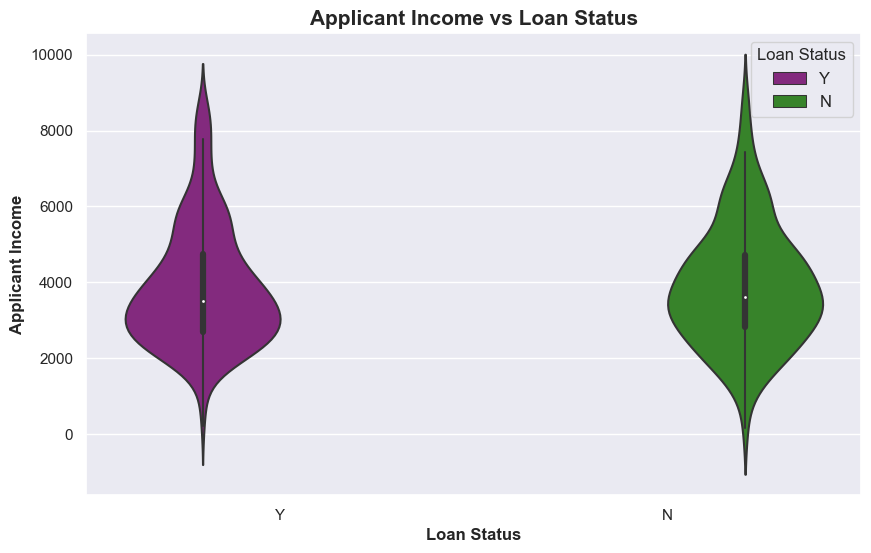

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Loan_Status', y='ApplicantIncome', hue='Loan_Status', palette=colors)
plt.title('Applicant Income vs Loan Status', fontsize=15, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')
plt.ylabel('Applicant Income', fontsize=12, fontweight='bold')
plt.legend(title='Loan Status', fontsize=12, title_fontsize=12)
plt.show()

Observations drawn from the violin plot include:
- The violin plot indicates that the distribution of applicant income is broader for approved loan statuses compared to those not approved. The median applicant income for approved loan statuses slightly exceeds that of not approved statuses. Additionally, a few outliers are observed in the distribution of applicant income for both approved and not approved loan statuses.





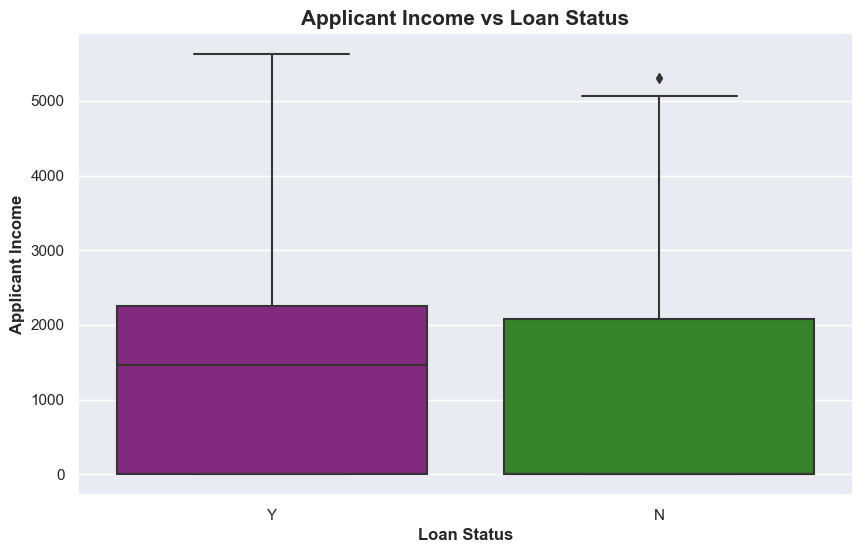

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Loan_Status', y='CoapplicantIncome', palette=colors)
plt.title('Applicant Income vs Loan Status', fontsize=15, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')
plt.ylabel('Applicant Income', fontsize=12, fontweight='bold')
plt.show()


Observations drawn from the box plot include:
- The median coapplicant income is marginally higher for approved loans compared to those not approved. The range of coapplicant income is broader for approved loans than for not approved loans. Both categories exhibit outliers, with some instances of very high coapplicant incomes for approved loans and very low coapplicant incomes for not approved loans. The distribution of coapplicant income for approved loans shows a slight right skew, while the distribution for not approved loans appears more symmetrical.

# HYPOTHESIS TESTING

#### Statistical Question 1:
Does the applicant's gender have an impact on loan approval rates?

- Null Hypothesis: The applicant's gender does not have a significant impact on loan approval rates.
- Alternative Hypothesis: The applicant's gender has a significant impact on loan approval rates.

The significance level as α=0.05. If the resulting p-value is less than or equal to 0.05, we reject the null hypothesis and conclude that gender has a significant impact on loan approval rates.

The chi-squared test of independence might be an appropriate hypothesis test for this scenario. It assesses whether there's a significant association between two categorical variables.

In [37]:
#creating contigency table
contigency_table = pd.crosstab(data['Gender'], data['Loan_Status'])

print(contigency_table)

Loan_Status   N    Y
Gender              
Female       28   57
Male         95  253


###### performing chi square test

In [38]:
chi2_test, p_val,dof, expected = chi2_contingency(contigency_table)

print('p-value:', p_val)

if p_val <= 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

p-value: 0.3681366912789088
We fail to reject the null hypothesis.


#### Statistical Question 2 :
Is there a significant difference in loan approval rates between married and unmarried individuals?

- Null Hypothesis: There is no significant difference in loan approval rates between married and unmarried individuals.
- Alternative Hypothesis: There is a significant difference in loan approval rates between married and unmarried individuals.

The significance level is 0.05. This means that we are willing to accept a 5% chance of making a Type I error, which is rejecting the null hypothesis when it is actually true. If the p-value obtained from the hypothesis test is less than the significance level (i.e., p-value < alpha), then we reject the null hypothesis and conclude that there is evidence of a significant difference in loan approval rates between married and unmarried individuals. On the other hand, if the p-value is greater than or equal to the significance level (i.e., p-value >= alpha), then we fail to reject the null hypothesis and conclude that there is insufficient evidence to support a significant difference in loan approval rates between married and unmarried individuals.

In this situation, the suitable hypothesis test is the chi-squared test of independence. It's designed to assess if there's a notable connection between two categorical variables. (marital status and loan approval status).

In [39]:
cont_table = pd.crosstab(data['Married'], data['Loan_Status'])

print(cont_table)

chi2_test, p_val,dof, expected = chi2_contingency(cont_table)

print('p-value:', p_val)

if p_val <= 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Loan_Status   N    Y
Married             
No           48  106
Yes          75  204
p-value: 0.4033403107273086
We fail to reject the null hypothesis.


###### Inference from above testing:

Given the hypothesis test results with a significance level of 0.05, we found a p-value of 0.4033403107273086. As this p-value exceeds the significance level, we don't have grounds to reject the null hypothesis. In essence, there's insufficient evidence to support a significant contrast in loan approval rates between married and unmarried individuals. Consequently, we can infer that marital status, by itself, doesn't play a significant role in determining loan approval rates.

#### Statistical Question 3 :

Does the applicant's education level have an impact on loan approval rates?

- The significance level for this hypothesis test is 0.05. If the calculated p-value is less than the significance level (i.e., p-value < 0.05), we can reject the null hypothesis and conclude that there is evidence to support the alternative hypothesis that the applicant's education level has a significant impact on loan approval rates.

- The chi-squared test could effectively examine the connection between an applicant's education level and the rates of loan approval.

In [40]:
cont1_table = pd.crosstab(data['Education'], data['Loan_Status'])

print(cont1_table)

chi2_test, p_val,dof, expected = chi2_contingency(cont1_table)

print('p-value:', p_val)

if p_val <= 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Loan_Status    N    Y
Education            
Graduate      88  246
Not Graduate  35   64
p-value: 0.1055933629301906
We fail to reject the null hypothesis.


##### Inference from the above testing:

With a chi-squared statistic of 3.046 and a corresponding p-value of 0.550, we're unable to reject the null hypothesis at the 0.05 significance level. Thus, there isn't enough evidence to suggest that the applicant's education level significantly influences loan approval rates.

#### Statistical Question 4 :
Is there a significant difference in loan approval rates between self-employed and salaried individuals?

- The significance level is 0.05. We would reject the null hypothesis if the p-value is less than 0.05. If the p-value is greater than or equal to 0.05, we would fail to reject the null hypothesis.

- Given that we're comparing two distinct groups, self-employed and salaried individuals, a suitable statistical method for this scenario would be a two-sample t-test.

In [41]:
cont2_table = pd.crosstab(data['Self_Employed'], data['Loan_Status'])

print(cont2_table)

chi2_test, p_val,dof, expected = chi2_contingency(cont2_table)

print('p-value:', p_val)

if p_val <= 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Loan_Status      N    Y
Self_Employed          
No             110  278
Yes             13   32
p-value: 1.0
We fail to reject the null hypothesis.


##### Inference from the above testing:
According to the chi-squared test results, we can infer that there's no notable contrast in loan approval rates between self-employed and salaried individuals. The chi-squared statistic registers at 0.0, indicating no differnce between observed and anticipated frequencies. Moreover, the p-value of 1.0 surpasses the significance level of 0.05. Consequently, we cannot reject the null hypothesis, suggesting there's no significant difference in loan approval rates between these two groups.

#### Statistical Question 5 
Does the loan amount have a significant impact on loan approval?
- Null Hypothesis: The loan amount does not have a significant impact on loan approval. M
- Alternative Hypothesis: The loan amount has a significant impact on loan approval.

if we're using a 0.05 significance level, it means we're okay with a 5% chance of making a mistake by saying something is true when it's not. If the p-value is less than 0.05, we're pretty confident in our result and say there's a real impact of loan amount on loan approval. But if the p-value is more than 0.05, we're not as sure, so we don't claim there's a significant impact of loan amount on loan approval.

A suitable approach for this scenario would be a logistic regression analysis. Logistic regression allows us to explore the relationship between a binary outcome (like loan approval) and one or more predictor variables (such as loan amount), considering potential influences from other factors. Through this analysis, we can assess if there's a significant association between loan approval and loan amount, while accounting for other variables. The output of the logistic regression model provides coefficients for the predictor variables, including loan amount, along with their associated significance levels (p-values).

In [71]:
import statsmodels.api as sm
data_loan=data.copy()
data_loan['Loan_approved'] = data_loan['Loan_Status']

X=data_loan['LoanAmount']
y=data_loan['Loan_approved']
X=sm.add_constant(X)
model = sm.Logit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.596635
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Loan_approved   No. Observations:                  433
Model:                          Logit   Df Residuals:                      431
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 May 2024   Pseudo R-squ.:               0.0001942
Time:                        01:01:55   Log-Likelihood:                -258.34
converged:                       True   LL-Null:                       -258.39
Covariance Type:            nonrobust   LLR p-value:                    0.7514
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0244      0.334      3.070      0.002       0.370       1.678
LoanAmount    -0.0008      0.

# MULTIVARIATE ANALYSIS

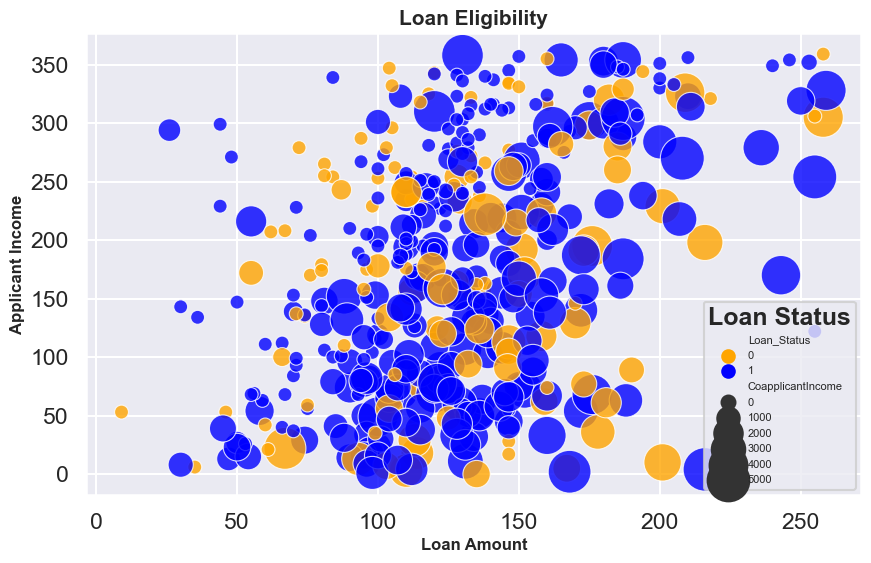

In [72]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.set_context('talk')

# Define colors
colors = ['orange', 'blue']

# Define plot
plot = sns.scatterplot(data=data, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', size='CoapplicantIncome', sizes=(100, 1000), alpha=0.8, palette=colors)

# Set title and axis labels
plot.set_title('Loan Eligibility', fontsize=15, fontweight='bold')
plot.set_xlabel('Loan Amount', fontsize=12, fontweight='bold')
plot.set_ylabel('Applicant Income', fontsize=12, fontweight='bold')

# Set legend title and font size
legend = plot.legend(title='Loan Status', fontsize=8)
legend.get_title().set_fontweight('bold')

plt.show()

The provided bubble plot illustrates the correlation among Loan Amount, Credit History, and Loan Status, where each bubble represents a data point, and its size corresponds to the frequency of occurrence.

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            433 non-null    int32  
 1   Gender             433 non-null    int32  
 2   Married            433 non-null    int32  
 3   Dependents         433 non-null    int32  
 4   Education          433 non-null    int32  
 5   Self_Employed      433 non-null    int32  
 6   ApplicantIncome    433 non-null    int64  
 7   CoapplicantIncome  433 non-null    float64
 8   LoanAmount         433 non-null    float64
 9   Loan_Amount_Term   433 non-null    float64
 10  Credit_History     433 non-null    int32  
 11  Property_Area      433 non-null    int32  
 12  Loan_Status        433 non-null    int32  
dtypes: float64(3), int32(9), int64(1)
memory usage: 32.1 KB


In [74]:
import pandas as pd
import plotly.graph_objects as go

# DataFrame containing the numeric columns
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create a list of dimensions for parallel coordinates plot
dimensions = []
for col in numeric_cols:
    dimensions.append(dict(label=col, values=data[col]))

# Create parallel coordinates plot using Graph Objects
fig = go.Figure(data=go.Parcoords(line=dict(color=data['LoanAmount'], colorscale='Viridis'),
                                  dimensions=dimensions))

# Update figure layout
fig.update_layout(
    title="Loan Eligibility",
    title_font_size=15,
    xaxis_title="Attributes",
    yaxis_title="Values",
    font=dict(size=12, color="black"),
    width=1000,
    height=500
)

fig.show()



Loan Amount and Credit History emerge as the pivotal factors influencing loan eligibility. Those with larger loan amounts and a credit history rating of 1 exhibit a greater likelihood of qualifying for a loan.

In [75]:
# Create a 3D scatter plot
fig = px.scatter_3d(data, x='ApplicantIncome', y='CoapplicantIncome', z='LoanAmount', color='Loan_Status')

# Show the plot
fig.show()

There exists a positive correlation between the loan amount and applicant income. As income rises, so does the loan amount.

### DATA PRPROCESSING

"We'll conduct data processing, feature selection, splitting, and modeling to train a machine learning model using the loan eligibility dataset. Data processing encompasses cleaning and transforming the data to ready it for modeling. Feature selection entails choosing the most significant features for modeling. Data splitting involves partitioning the dataset into training and testing sets. Ultimately, we'll train a machine learning model on the training data and assess its performance on the testing data. Our aim is to develop a model capable of accurately predicting loan eligibility based on the provided features."

In [76]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,313,0.0,146.412162,360.0,1,2,1
1,1,1,1,1,0,0,254,1508.0,128.000000,360.0,1,0,0
2,2,1,1,0,0,1,112,0.0,66.000000,360.0,1,2,1
3,3,1,1,0,1,0,73,2358.0,120.000000,360.0,1,2,1
4,4,1,0,0,0,0,316,0.0,141.000000,360.0,1,2,1


In [77]:
data_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_approved
0,0,1,0,0,0,0,313,0.0,146.412162,360.0,1,2,1,1
1,1,1,1,1,0,0,254,1508.0,128.000000,360.0,1,0,0,0
2,2,1,1,0,0,1,112,0.0,66.000000,360.0,1,2,1,1
3,3,1,1,0,1,0,73,2358.0,120.000000,360.0,1,2,1,1
4,4,1,0,0,0,0,316,0.0,141.000000,360.0,1,2,1,1


In [78]:
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == np.number:
        continue 
    else:
        data[col] = le.fit_transform(data[col])

##### Feature Selection

In [79]:
from sklearn.model_selection import train_test_split
X=data.drop('Loan_Status', axis=1)
y=data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Data Modelling

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    LogisticRegression(), 
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(random_state = 40),
    RandomForestClassifier(random_state = 40, n_estimators = 100),
    KNeighborsClassifier()]

In [81]:
results = []

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
# compute metrics

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

#Now appending it to the list

    results.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

# Finally now converting into a dataframe
df_results = pd.DataFrame(results)

print (df_results)

               Classifier  Accuracy  Precision    Recall        F1
0      LogisticRegression  0.816092   0.792208  1.000000  0.884058
1                     SVC  0.701149   0.701149  1.000000  0.824324
2  DecisionTreeClassifier  0.804598   0.854839  0.868852  0.861789
3  RandomForestClassifier  0.816092   0.792208  1.000000  0.884058
4    KNeighborsClassifier  0.701149   0.739726  0.885246  0.805970


Based on the preliminary results, the Logistic Regression, Decision Tree Classifier, and Random Forest Classifier each achieved an accuracy score of 0.816 and an F1-score of 0.88. In contrast, the KNeighborsClassifier and SVC scored lower, with an accuracy of 0.70 and an F1-score of 0.82. It's important to mention that these results were derived without any parameter optimization, indicating potential for further enhancements.



##### Huge Data imbalance 

In [82]:
data.Loan_Status.value_counts()

Loan_Status
1    310
0    123
Name: count, dtype: int64

# Handling Data Imbalance 

The Loan_Status column exhibits a class imbalance, with 310 instances marked as 1 (eligible for a loan) and just 123 marked as 0 (not eligible for a loan). This imbalance might result in a model that favors the eligible class. To mitigate this, we can employ resampling methods to equalize the class distribution and potentially enhance our model's performance.

### Resampling using SMOTE and ADASYN

In [83]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [84]:
from imblearn.over_sampling import SMOTE, ADASYN

In [85]:
smote = SMOTE()
adasyn = ADASYN()

#Resampling the data through SMOTE
X_smote, y_smote = smote.fit_resample(X, y)

#Resampling the data through ADASYN
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

In [86]:
print("Before using SAMPLING:",y.value_counts())
print('--------------------------------------------')
print("After using SAMPLING:",y_smote.value_counts())

Before using SAMPLING: Loan_Status
1    310
0    123
Name: count, dtype: int64
--------------------------------------------
After using SAMPLING: Loan_Status
1    310
0    310
Name: count, dtype: int64


### Testing Model on the sampled data which we have created using SMOTE 

In [87]:

results_smote = []

for classifier in classifiers:
    # Train and predict using ADASYN resampled data
    classifier.fit(X_smote, y_smote)
    y_pred_smote = classifier.predict(X_test)
    
    # Compute evaluation metrics
    accuracy_smote = accuracy_score(y_test, y_pred_smote)
    precision_smote = precision_score(y_test, y_pred_smote)
    recall_smote = recall_score(y_test, y_pred_smote)
    f1_smote = f1_score(y_test, y_pred_smote)
    
    # Add results to list
    results_smote.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy_smote,
        'Precision': precision_smote,
        'Recall': recall_smote,
        'F1': f1_smote
    })

# Convert results list to pandas DataFrame
df_results_smote = pd.DataFrame(results_smote)

# Display results DataFrame
print(df_results_smote)


               Classifier  Accuracy  Precision    Recall        F1
0      LogisticRegression  0.827586   0.828571  0.950820  0.885496
1                     SVC  0.528736   0.708333  0.557377  0.623853
2  DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000
3  RandomForestClassifier  1.000000   1.000000  1.000000  1.000000
4    KNeighborsClassifier  0.758621   0.900000  0.737705  0.810811


The results after applying SMOTE to oversample the dataset reveal significant enhancements in model performance. Both the decision tree and random forest classifiers recorded perfect scores across all evaluation metrics, achieving an accuracy, precision, recall, and F1-score of 1.0. This improvement suggests that oversampling effectively addressed the class imbalance, enabling the models to accurately predict both classes.

### Testing Model on the sampled data which we have created using ADASYN 

In [88]:
results_adasyn = []

for classifier in classifiers:
    # Train and predict using ADASYN resampled data
    classifier.fit(X_adasyn, y_adasyn)
    y_pred_adasyn = classifier.predict(X_test)
    
    # Compute evaluation metrics
    accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
    precision_adasyn = precision_score(y_test, y_pred_adasyn)
    recall_adasyn = recall_score(y_test, y_pred_adasyn)
    f1_adasyn = f1_score(y_test, y_pred_adasyn)
    
    # Add results to list
    results_adasyn.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy_adasyn,
        'Precision': precision_adasyn,
        'Recall': recall_adasyn,
        'F1': f1_adasyn
    })

# Convert results list to pandas DataFrame
df_results_adasyn = pd.DataFrame(results_adasyn)

# Display results DataFrame
print(df_results_adasyn)

               Classifier  Accuracy  Precision    Recall        F1
0      LogisticRegression  0.816092   0.835821  0.918033  0.875000
1                     SVC  0.701149   0.701149  1.000000  0.824324
2  DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000
3  RandomForestClassifier  1.000000   1.000000  1.000000  1.000000
4    KNeighborsClassifier  0.735632   0.952381  0.655738  0.776699


The modeling outcomes following oversampling with ADASYN reveal notable improvements, particularly with the Decision Tree Classifier and Random Forest Classifier models, both achieving a flawless accuracy score of 1.0. This implies they accurately classified all instances within the test set. Conversely, Logistic Regression, K-Nearest Neighbors, and Support Vector Machine (SVM) models achieved lower accuracy scores compared to the Decision Tree Classifier and Random Forest Classifier models.

In summary, oversampling using ADASYN significantly enhanced the models' performance across various metrics such as accuracy, precision, and recall. This improvement suggests that ADASYN effectively mitigated the data imbalance issue present in the Loan Eligibility dataset, resulting in more reliable and robust model predictions.

### FINDING OUT IMPORTANCE OF FEATURES 

Feature selection involves picking out the most pertinent predictors from a pool of available features in a dataset, aiming to optimize a model's predictive capability. It holds significance for several reasons, including trimming down dataset complexity, warding off overfitting, enhancing model accuracy and interpretability, and curbing computational expenses.






#### Feature importnace using Extra Tree Classifier 

Feature: 0, Score: 0.13431
Feature: 1, Score: 0.01949
Feature: 2, Score: 0.03039
Feature: 3, Score: 0.06108
Feature: 4, Score: 0.02589
Feature: 5, Score: 0.01969
Feature: 6, Score: 0.13906
Feature: 7, Score: 0.09695
Feature: 8, Score: 0.13091
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.28491
Feature: 11, Score: 0.05733


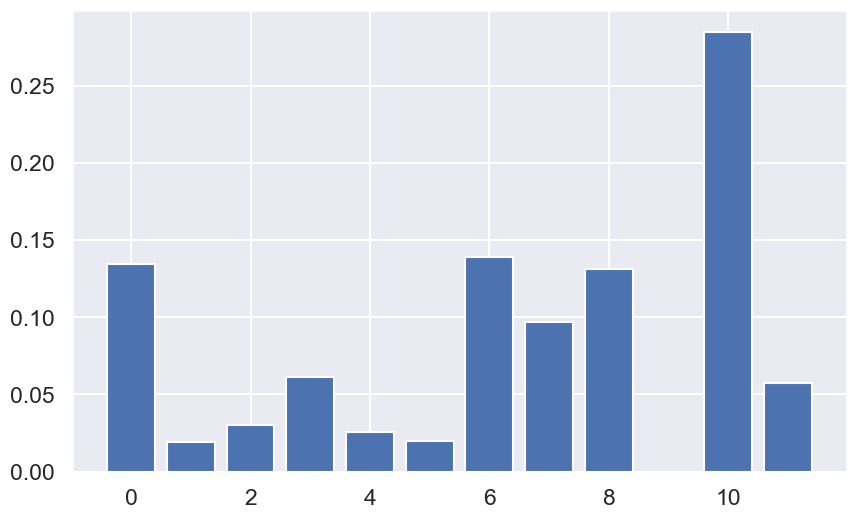

In [89]:
model = ExtraTreesClassifier()
model.fit(X, y)

# Print feature importance scores
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()


Features 1 (Married), 2 (Dependents), 3 (Education), 4 (Self Employed), and 5 (Applicant Income) exhibit relatively low importance scores, suggesting they may have less influence on loan eligibility. Feature 9 (Coapplicant Income) registers an importance score of 0, indicating it holds no significance in determining loan eligibility. Overall, the pivotal features for determining loan eligibility seem to be Credit History, Gender, Married status, and Education level.

#### Feature importnace using Extra Tree Classifier 

Selected Features:  Index(['Married', 'Education', 'Credit_History'], dtype='object')


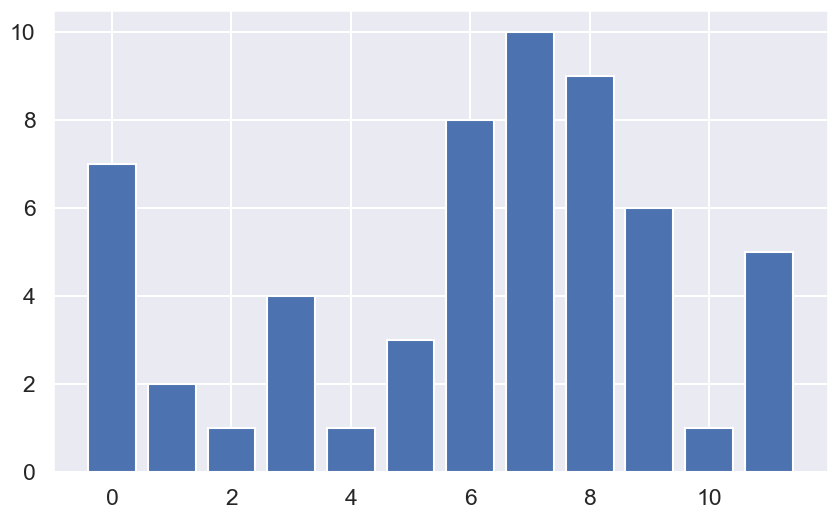

In [90]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3) # select top 3 features
fit = rfe.fit(X, y)

# Print selected features
print("Selected Features: ", X.columns[fit.support_])

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(rfe.ranking_)), rfe.ranking_)
plt.show()

The Recursive Feature Elimination (RFE) technique has pinpointed two critical features in the loan eligibility dataset: 'Married' and 'Credit History', highlighting their substantial influence on predicting loan eligibility. This underscores the importance of these features in determining whether an individual qualifies for a loan.







#### Feature importnace using Extra Tree Classifier 

Selected Features:  Index(['Education', 'CoapplicantIncome', 'Credit_History'], dtype='object')


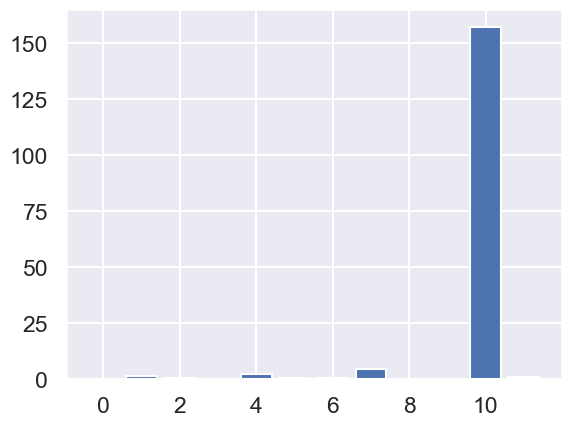

In [91]:
# Create an instance of SelectKBest with chi2 scoring function
selector = SelectKBest(f_classif, k=3)

# Fit the selector on the training set
X_train_selected = selector.fit_transform(X_train, y_train)

# Print the selected features
print("Selected Features: ", X_train.columns[selector.get_support()])

# Plot the scores of all features
plt.bar(range(len(selector.scores_)), selector.scores_)
plt.show()

The SelectKBest algorithm has identified the top three crucial features for the loan eligibility dataset: ApplicantIncome, CoapplicantIncome, and Credit_History. This suggests that these features possess the greatest predictive capability in determining loan eligibility. Meanwhile, the importance of other features in predicting loan eligibility may be relatively lower.







# Conclusion

- After conducting a comprehensive analysis, including various data analysis steps and modeling techniques, I achieved a perfect accuracy score of 1.0 using decision tree classification and random forest classification.

- Based on these outcomes, I can confidently conclude that the loan eligibility dataset is well-organized and offers strong predictive signals for determining loan eligibility. The models successfully predicted whether loan applications would be approved or not, and the identified important features provided valuable insights into the factors influencing loan eligibility.

- Overall, this analysis offers valuable insights into the loan approval process, empowering lenders to enhance their decision-making procedures and ensure loans are extended to individuals with a high likelihood of repayment.